# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [102]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1. Loading Data

In [3]:
project_data = pd.read_csv('train_data.csv',nrows= 100000)
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (100000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 2. Preprocessing

### Preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


### Preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My students come from hardworking, loving families.  I have students from all socioeconomic classes and many ethnic backgrounds.  The families of our students are loving and involved in their kids' lives.  Unfortunately several of our families work more than one job to make ends meet and some come from single parent homes.  With this being said our parents still make time to work with their kids on homework and nightly reading.  They know how important school is for their children.  My students love to learn and are ready the minute they walk through the door.  I want to make the absolute most of my time with them.\r\n\r\nAt this age kids have their own ideas of what school should be and if we listen to them they will inspire us to make school more fun!!!\r\n\r\nMy students learn best through play.  They enjoy games and activities that will teach them about real life events and get them up and moving.  Anytime they are not sitting at their desk they are so much happier and want to lear

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students come from hardworking, loving families.  I have students from all socioeconomic classes and many ethnic backgrounds.  The families of our students are loving and involved in their kids' lives.  Unfortunately several of our families work more than one job to make ends meet and some come from single parent homes.  With this being said our parents still make time to work with their kids on homework and nightly reading.  They know how important school is for their children.  My students love to learn and are ready the minute they walk through the door.  I want to make the absolute most of my time with them.    At this age kids have their own ideas of what school should be and if we listen to them they will inspire us to make school more fun!!!    My students learn best through play.  They enjoy games and activities that will teach them about real life events and get them up and moving.  Anytime they are not sitting at their desk they are so much happier and want to learn so muc

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students come from hardworking loving families I have students from all socioeconomic classes and many ethnic backgrounds The families of our students are loving and involved in their kids lives Unfortunately several of our families work more than one job to make ends meet and some come from single parent homes With this being said our parents still make time to work with their kids on homework and nightly reading They know how important school is for their children My students love to learn and are ready the minute they walk through the door I want to make the absolute most of my time with them At this age kids have their own ideas of what school should be and if we listen to them they will inspire us to make school more fun My students learn best through play They enjoy games and activities that will teach them about real life events and get them up and moving Anytime they are not sitting at their desk they are so much happier and want to learn so much more They think they are jus

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 100000/100000 [01:09<00:00, 1438.93it/s]


In [18]:
print(project_data['essay'].values[5000])

Teaching fourth graders is definitely a challenging task each day but one I wake up ready to tackle. My fourth graders are bright, kind, and amazingly sweet kiddos. They are creative, innovative, and willing to tackle any task I throw their way. They are technologically savvy, and love to move! \r\n\r\nMy students love choices and love to move to do their work. They love to read in different spots around the classroom, and use clipboards. The best part of my job is watching them grow and learn each day! \r\n\r\n\r\nWe always hear that we should give our kiddos choices. Yet, we rarely give them choices of when and how they sit in class all day. My students sit in a hard chair or on the hard linoleum floor. Yet, neither option is comfortable. \r\n\r\nMy goal is to help my students be more comfortable by giving them a variety of choices. I want to give them options to sit on a bean bag chair or use a lap desk on a carpet square, or sit on a bar stool at a standing desk. Kids crave options

In [19]:
# after preprocesing
preprocessed_essays[5000]

'teaching fourth graders definitely challenging task day one i wake ready tackle my fourth graders bright kind amazingly sweet kiddos they creative innovative willing tackle task i throw way they technologically savvy love move my students love choices love move work they love read different spots around classroom use clipboards the best part job watching grow learn day we always hear give kiddos choices yet rarely give choices sit class day my students sit hard chair hard linoleum floor yet neither option comfortable my goal help students comfortable giving variety choices i want give options sit bean bag chair use lap desk carpet square sit bar stool standing desk kids crave options choices like they need options learn grow day by giving different options students grow able actually comfortable classroom nannan'

In [20]:
# after preprocesing
project_data['preprocessed_essays'] = preprocessed_essays

In [21]:
print(project_data['preprocessed_essays'].values[5000])

teaching fourth graders definitely challenging task day one i wake ready tackle my fourth graders bright kind amazingly sweet kiddos they creative innovative willing tackle task i throw way they technologically savvy love move my students love choices love move work they love read different spots around classroom use clipboards the best part job watching grow learn day we always hear give kiddos choices yet rarely give choices sit class day my students sit hard chair hard linoleum floor yet neither option comfortable my goal help students comfortable giving variety choices i want give options sit bean bag chair use lap desk carpet square sit bar stool standing desk kids crave options choices like they need options learn grow day by giving different options students grow able actually comfortable classroom nannan


### Preprocessing of `project_title` (Text data)

In [22]:
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[100])
print("="*50)
print(project_data['project_title'].values[200])
print("="*50)
print(project_data['project_title'].values[500])
print("="*50)

Engineering STEAM into the Primary Classroom
\"Bringing the FUTURE into our Classroom\"
The Outdoor Classroom
Mini iPads for Many Fingers
ILT loves PE!!


In [23]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 100000/100000 [00:03<00:00, 30490.02it/s]


In [24]:
# after preprocesing
preprocessed_title[100]

'the outdoor classroom'

In [25]:
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[100])
print("="*50)
print(project_data['project_title'].values[200])
print("="*50)
print(project_data['project_title'].values[500])
print("="*50)


Engineering STEAM into the Primary Classroom
\"Bringing the FUTURE into our Classroom\"
The Outdoor Classroom
Mini iPads for Many Fingers
ILT loves PE!!


In [26]:
project_data['preprocessed_title'] = preprocessed_title

In [27]:
print(project_data['preprocessed_title'].values[0])
print("="*50)
print(project_data['preprocessed_title'].values[150])
print("="*50)
print(project_data['preprocessed_title'].values[100])
print("="*50)
print(project_data['preprocessed_title'].values[200])
print("="*50)
print(project_data['preprocessed_title'].values[500])
print("="*50)

engineering steam primary classroom
bringing future classroom
the outdoor classroom
mini ipads many fingers
ilt loves pe


### Preprocessing categorical features : project_grade_category

In [28]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    40460
Grades 3-5       34028
Grades 6-8       15478
Grades 9-12      10034
Name: project_grade_category, dtype: int64

In [29]:
# we need to remove spaces, replace '-' with '_' and conver all letters to small
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    40460
grades_3_5       34028
grades_6_8       15478
grades_9_12      10034
Name: project_grade_category, dtype: int64

### Preprocessing categorical features : teacher_prefix

In [30]:
project_data['teacher_prefix'].value_counts()

Mrs.       52403
Ms.        35690
Mr.         9733
Teacher     2158
Dr.           13
Name: teacher_prefix, dtype: int64

In [31]:
print(project_data['teacher_prefix'].isnull().values.any())
print("Number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
Number of nan values 3


In [32]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('Mrs.')

In [33]:
project_data['teacher_prefix'].value_counts()

Mrs.       52406
Ms.        35690
Mr.         9733
Teacher     2158
Dr.           13
Name: teacher_prefix, dtype: int64

In [34]:
#remove '.' and convert chars to small
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()

In [35]:
project_data['teacher_prefix'].value_counts()

mrs        52406
ms         35690
mr          9733
teacher     2158
dr            13
Name: teacher_prefix, dtype: int64

### Preprocessing categorical features : school_state

In [36]:
project_data['school_state'].value_counts()

CA    14090
TX     6764
NY     6704
FL     5693
NC     4651
IL     3983
GA     3630
SC     3594
MI     2886
PA     2847
IN     2409
MO     2368
OH     2273
MA     2183
LA     2164
WA     2130
OK     2111
NJ     2042
AZ     1969
VA     1872
WI     1668
AL     1606
UT     1584
TN     1545
CT     1511
MD     1384
NV     1252
MS     1198
KY     1197
OR     1141
MN     1100
CO     1024
AR      946
ID      633
IA      606
KS      581
NM      498
DC      477
WV      472
HI      468
ME      464
AK      321
DE      313
NH      312
NE      288
SD      269
RI      264
MT      216
ND      134
WY       90
VT       75
Name: school_state, dtype: int64

In [37]:
#convert school state to lower case
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    14090
tx     6764
ny     6704
fl     5693
nc     4651
il     3983
ga     3630
sc     3594
mi     2886
pa     2847
in     2409
mo     2368
oh     2273
ma     2183
la     2164
wa     2130
ok     2111
nj     2042
az     1969
va     1872
wi     1668
al     1606
ut     1584
tn     1545
ct     1511
md     1384
nv     1252
ms     1198
ky     1197
or     1141
mn     1100
co     1024
ar      946
id      633
ia      606
ks      581
nm      498
dc      477
wv      472
hi      468
me      464
ak      321
de      313
nh      312
ne      288
sd      269
ri      264
mt      216
nd      134
wy       90
vt       75
Name: school_state, dtype: int64

In [38]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [39]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [40]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 3. Preparing data for models

In [41]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_title', 'price', 'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical     

In [42]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            mrs   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df             ms   

  school_state                Date project_grade_category  \
0           ca 2016-04-27 00:27:36          grades_prek_2   
1           ut 2016-04-27 00:31:25             grades_3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  ...  \
0  My students come from a variety of backgrounds...  ...   
1  Most of my students have autism, anxiety, anot...  ...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                           53                   1   
1                                            4                   1   

   clean_categories                 clean_subcategories  \
0      Math_Science  AppliedSciences Health_LifeScience   
1      SpecialNeeds                        SpecialNeeds   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                 preprocessed_essays  \
0  i fortunate enough use fairy tale stem kits cl...   
1  imagine 8 9 years old you third grade classroo...   

                    preprocessed_title   price quantity  
0  engineering steam primary classroom  725.05        4  
1                  sensory tools focus  213.03        8  

[2 rows x 22 columns]

<h1>4. Decision Tree </h1>

<h2>4.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [43]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(2)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)


<h2>4.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)
#print(X_test.head(2))
print(type(X_test))

(67000, 21) (67000,)
(33000, 21) (33000,)
<class 'pandas.core.frame.DataFrame'>


### Vectorizing Categorical features

#### Vectorizing : clean_categories 

In [45]:
# Vectorizing clean_categories feature
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())

X_train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_categories_one_hot.shape, y_train.shape)
#print(X_cv_categories_one_hot.shape, y_cv.shape)
print(X_test_categories_one_hot.shape, y_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig 
(67000, 9) (67000,)
(33000, 9) (33000,)


#### Vectorizing : clean_subcategories 

In [46]:
# Vectorizing clean_subcategories feature
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())


X_train_sub_categories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_sub_categories_one_hot.shape, y_train.shape)
#print(X_cv_sub_categories_one_hot.shape, y_cv.shape)
print(X_test_sub_categories_one_hot.shape, y_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig 
(67000, 30) (67000,)
(33000, 30) (33000,)


#### Vectorizing : school_state 

In [47]:
#code ref: https://www.youtube.com/watch?time_continue=849&v=ZhLXULFjIjQ&feature=emb_logo
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
# vectorizing school_state feature
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values)

X_train_school_state_one_hot = vectorizer.transform(X_train['school_state'].values)
#X_cv_school_state_one_hot = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_one_hot = vectorizer.transform(X_test['school_state'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_school_state_one_hot.shape, y_train.shape)
#print(X_cv_school_state_one_hot.shape, y_cv.shape)
print(X_test_school_state_one_hot.shape, y_test.shape)
print("="*100)

Shape of matrix after one hot encodig 
(67000, 51) (67000,)
(33000, 51) (33000,)


#### Vectorizing : teacher_prefix 

In [48]:
#teacher_prefix encoding
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values)
#X_cv_teacher_prefix_one_hot = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_teacher_prefix_one_hot.shape, y_train.shape)
#print(X_cv_teacher_prefix_one_hot.shape, y_cv.shape)
print(X_test_teacher_prefix_one_hot.shape, y_test.shape)

print(vectorizer.get_feature_names())
print("="*100)

Shape of matrix after one hot encodig 
(67000, 5) (67000,)
(33000, 5) (33000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


#### Vectorizing : project_grade_category 

In [49]:
# Vectorizing project_grade_category 
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category_one_hot= vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_project_grade_category_one_hot= vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_one_hot= vectorizer.transform(X_test['project_grade_category'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_project_grade_category_one_hot.shape, y_train.shape)
#print(X_cv_project_grade_category_one_hot.shape, y_cv.shape)
print(X_test_project_grade_category_one_hot.shape, y_test.shape)
print("="*100)

Shape of matrix after one hot encodig 
(67000, 4) (67000,)
(33000, 4) (33000,)


### Encoding numerical features

#### Encoding numerical feature: Price

In [50]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_price_standardized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
#X_cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
X_test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

print("Shape of matrix after encodig ")
print(X_train_price_standardized.shape, y_train.shape)
#print(X_cv_price_standardized.shape, y_cv.shape)
print(X_test_price_standardized.shape, y_test.shape)

Mean : 299.7377617910447, Standard deviation : 381.02658871459346
Shape of matrix after encodig 
(67000, 1) (67000,)
(33000, 1) (33000,)


In [51]:
X_train_price_standardized
#X_cv_price_standardized 
X_test_price_standardized 

array([[ 1.25511513],
       [-0.13447293],
       [-0.34128264],
       ...,
       [-0.33396032],
       [-0.70558793],
       [-0.19480993]])

#### Vectorizing : teacher_number_of_previously_posted_projects : numerical

In [52]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
#X_cv_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
X_test_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print("Shape of the matrix after vectorization:")
print(X_train_teacher_number_of_previously_posted_projects_standardized.shape,y_train.shape)
#print(X_cv_teacher_number_of_previously_posted_projects_standardized.shape,y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_standardized.shape,y_test.shape)

Mean : 11.150567164179105, Standard deviation : 27.630244373800547
Shape of the matrix after vectorization:
(67000, 1) (67000,)
(33000, 1) (33000,)


### Vectozing Text data

#### Encoding eassay and project_title using TFIDF 

In [53]:
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfVectorizer
   
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

# Encoding preprocessed essays
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'].values) 

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
#X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
#print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

#Encoding preprocessed title

ectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_title'].values) 

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['preprocessed_title'].values)
#X_cv_title_tfidf = vectorizer.transform(X_cv['preprocessed_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['preprocessed_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
#print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

(67000, 21) (67000,)
(33000, 21) (33000,)
After vectorizations
(67000, 13735) (67000,)
(33000, 13735) (33000,)
After vectorizations
(67000, 2488) (67000,)
(33000, 2488) (33000,)


#### Preparing Set with TFIDF: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [54]:
#we need to merge all the numerical vectors i.e catogorical, text, numerical vectors
from scipy.sparse import hstack
X_train_set2 = hstack((X_train_title_tfidf, X_train_essay_tfidf, X_train_categories_one_hot, X_train_sub_categories_one_hot, X_train_school_state_one_hot, X_train_teacher_prefix_one_hot, X_train_project_grade_category_one_hot, X_train_price_standardized, X_train_teacher_number_of_previously_posted_projects_standardized)).tocsr()
#X_cv_set2= hstack((X_cv_title_tfidf, X_cv_essay_tfidf, X_cv_categories_one_hot, X_cv_sub_categories_one_hot, X_cv_school_state_one_hot, X_cv_teacher_prefix_one_hot, X_cv_project_grade_category_one_hot, X_cv_price_standardized, X_cv_teacher_number_of_previously_posted_projects_standardized)).tocsr()
X_test_set2 = hstack((X_test_title_tfidf, X_test_essay_tfidf, X_test_categories_one_hot, X_test_sub_categories_one_hot, X_test_school_state_one_hot, X_test_teacher_prefix_one_hot, X_test_project_grade_category_one_hot, X_test_price_standardized, X_test_teacher_number_of_previously_posted_projects_standardized)).tocsr()

print("Final Data matrix")
print(X_train_set2.shape, y_train.shape)
#print(X_cv_set2.shape, y_cv.shape)
print(X_test_set2.shape, y_test.shape)
print("="*100)

print(type(X_train_set2))

Final Data matrix
(67000, 16324) (67000,)
(33000, 16324) (33000,)
<class 'scipy.sparse.csr.csr_matrix'>


<h2>4.3 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 4.3.1 Applying Decision Tree on TFIDF featurization

#### Hyperparameter tuning

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Code ref: hhttps://michael-fuchs-python.netlify.app/2019/11/30/introduction-to-decision-trees/
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
   "max_depth": [1,5,10,50], 
   "min_samples_split": [5,10,100,500]
}

model = DecisionTreeClassifier()
clf = GridSearchCV(model, param_grid=params, cv=3, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_set2, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

In [56]:
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.853066      0.049336         0.029734        0.001620   
1       0.817196      0.004370         0.028671        0.000143   
2       0.840580      0.022410         0.028736        0.000137   
3       0.818398      0.002223         0.028629        0.000212   
4       3.660476      0.091149         0.030116        0.000130   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                     100   
3               1                     500   
4               5                       5   

                                       params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 5}           0.548671   
1   {'max_depth': 1, 'min_samples_split': 10}           0.548671   
2  {'max_depth': 1, 'min_samples_split': 100}           0.548671   
3  {'max_depth': 1, 'min_samples_split': 500}           0.548671   
4    {'max_depth': 5, 'min_samples_split': 5}           0.632564   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.547669           0.547571         0.547970        0.000497   
1           0.547669           0.547571         0.547970        0.000497   
2           0.547669           0.547571         0.547970        0.000497   
3           0.547669           0.547571         0.547970        0.000497   
4           0.625818           0.626115         0.628165        0.003112   

   rank_test_score  split0_train_score  split1_train_score  \
0               11            0.552449            0.551370   
1               11            0.552449            0.551370   
2               11            0.552449            0.551370   
3               11            0.552449            0.551370   
4                5            0.643396            0.644354   

   split2_train_score  mean_train_score  std_train_score  
0            0.550428          0.551416         0.000826  
1            0.550428          0.551416         0.000826  
2            0.550428          0.551416         0.000826  
3            0.550428          0.551416         0.000826  
4            0.641383          0.643044         0.001238

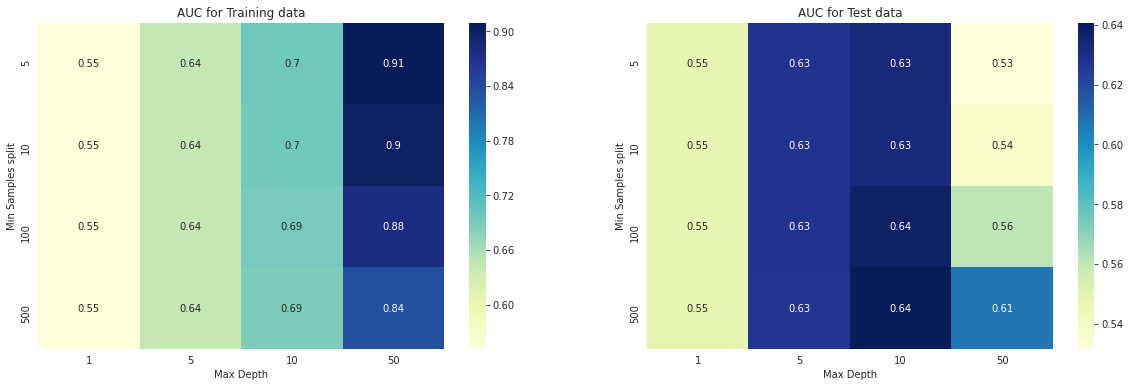

In [57]:
# Ref: https://www.kaggle.com/arindambanerjee/grid-search-simplified
import matplotlib.pyplot as plt
import seaborn as sns
max_depth_list = list(clf.cv_results_['param_max_depth'].data)
min_samples_split_list = list(clf.cv_results_['param_min_samples_split'].data)
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Min Samples split':min_samples_split_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Min Samples split', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Min Samples split':min_samples_split_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Min Samples split', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu", ).set_title('AUC for Test data')
plt.show()

In [58]:
print(clf.best_params_)
"""print(clf.best_estimator_)
print(clf.best_params_['min_samples_split'])
print(results)
print(clf.cv_results_['mean_train_score'])"""

{'max_depth': 10, 'min_samples_split': 500}


"print(clf.best_estimator_)\nprint(clf.best_params_['min_samples_split'])\nprint(results)\nprint(clf.cv_results_['mean_train_score'])"

#### Testing the performance of the model on test data, plotting ROC Curves

In [59]:
#here we are choosing the best paramaters
best_max_depth = 10
best_min_samples_split = 500

In [60]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred


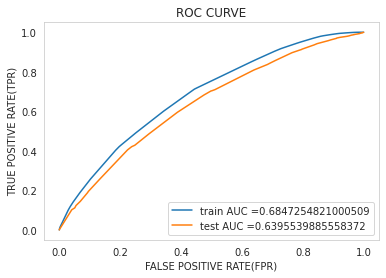

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split)
model.fit(X_train_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_train_set2)    
y_test_pred = batch_predict(model, X_test_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE(FPR)")
plt.ylabel("TRUE POSITIVE RATE(TPR)")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### Confusion Matrix

In [62]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [63]:
#ref link: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

"""train_predicted_pts= predict_with_best_t(y_train_pred, best_t)
print(train_predicted_pts)"""
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
tn,fp,fn,tp=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)).ravel()

tb = PrettyTable()
tb.title= 'Train confusion matrix'
tb.field_names= ("","Predicted: NO" ,"Predicted: YES")
tb.add_row(["Actual : NO",tn,fp ])
tb.add_row(["Actual : YES", fn,tp])
print(tb)

print("Test confusion matrix")
#collect predicted points
test_predicted_pts = predict_with_best_t(y_test_pred, best_t)
#print(test_predicted_pts)
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
tn,fp,fn,tp=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)).ravel()
tb = PrettyTable()
tb.title= 'Test confusion matrix'
tb.field_names= ("","Predicted: NO" ,"Predicted: YES")
tb.add_row(["Actual : NO",tn,fp ])
tb.add_row(["Actual : YES", fn,tp])
print(tb)

the maximum value of tpr*(1-fpr) 0.39777589313742323 for threshold 0.861
Train confusion matrix
[[ 5863  4290]
 [17689 39158]]
+-----------------------------------------------+
|             Train confusion matrix            |
+--------------+---------------+----------------+
|              | Predicted: NO | Predicted: YES |
+--------------+---------------+----------------+
| Actual : NO  |      5863     |      4290      |
| Actual : YES |     17689     |     39158      |
+--------------+---------------+----------------+
Test confusion matrix
[[ 2623  2378]
 [ 8883 19116]]
+-----------------------------------------------+
|             Test confusion matrix             |
+--------------+---------------+----------------+
|              | Predicted: NO | Predicted: YES |
+--------------+---------------+----------------+
| Actual : NO  |      2623     |      2378      |
| Actual : YES |      8883     |     19116      |
+--------------+---------------+----------------+


#### Get all false positive data points

In [66]:
print(len(y_test))
print(len(test_predicted_pts))
#print(type(y_test))
#print(y_test)
# Ref: https://www.appliedaicourse.com/wp-content/uploads/2019/03/Pandas-DataFrame-Notes.pdf

#Create dataframe with all the columns
fp_df = pd.DataFrame(columns=X_test.columns)

#check false positive data points i.e y_test==0 and y_predeicted==1
for i in range(len(test_predicted_pts)):
    if((y_test[i]==0) & (test_predicted_pts[i]==1)):
        # append false positive datapoint into fp_df dataframe(df = df.filter(items=[5], axis=0) #filter by row)
        fp_df= fp_df.append(X_test.filter(items=[i], axis=0)) 
#print(type(fp_df))
fp_df.head(2)

33000
33000


Unnamed: 0       id                        teacher_id teacher_prefix  \
87       90891  p211903  2fdbc42b01be840ed04dbe054804cc09            mrs   
146     130401  p212503  1a15f4c255c6288a0d521c191129fa6e            mrs   

    school_state                Date project_grade_category  \
87            nj 2016-04-27 12:39:53          grades_prek_2   
146           mo 2016-04-27 15:51:37          grades_prek_2   

                                       project_title  \
87                          Listening to a Good Book   
146  Leveled Readers for Intervention Reading Groups   

                                       project_essay_1  \
87   Who doesn't enjoy a good book? In fact my clas...   
146  I am a Title I Reading Intervention teacher an...   

                                       project_essay_2  ...  \
87   My class of 19 kindergarteners is very eager t...  ...   
146  I work with approximately 65 students a day (K...  ...   

                                       project_essay_4  \
87   A listening center will engage students while ...   
146  Research proves that students learn best in sm...   

                              project_resource_summary  \
87   My students need opportunities to hear fluent ...   
146  My students need leveled readers so I can inst...   

    teacher_number_of_previously_posted_projects  \
87                                             0   
146                                            0   

                      clean_categories                  clean_subcategories  \
87   AppliedLearning Literacy_Language            EarlyDevelopment Literacy   
146  AppliedLearning Literacy_Language  EarlyDevelopment Literature_Writing   

                                                 essay  \
87   Who doesn't enjoy a good book? In fact my clas...   
146  I am a Title I Reading Intervention teacher an...   

                                   preprocessed_essays  \
87   who not enjoy good book in fact class hungers ...   
146  i title i reading intervention teacher work lo...   

                              preprocessed_title   price  quantity  
87                           listening good book  276.50         4  
146  leveled readers intervention reading groups  693.31        26  

[2 rows x 21 columns]

#### Plot the WordCloud with the words of essay text of  `false positive data points`

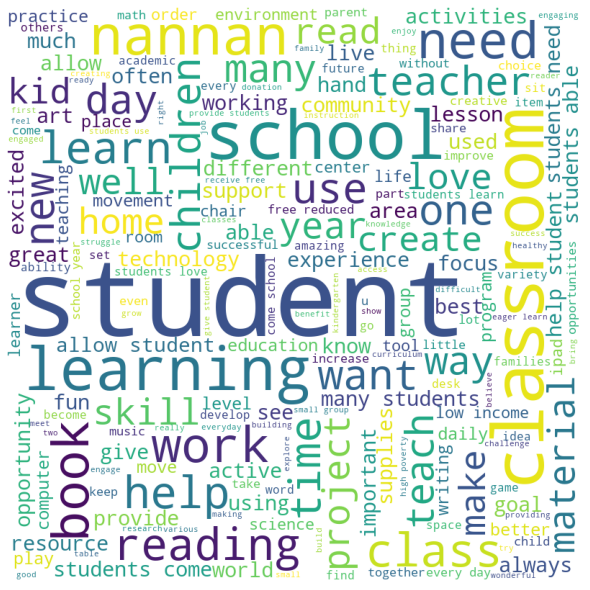

In [67]:
# Code ref: https://www.geeksforgeeks.org/generating-word-cloud-python/

# Generate WordCloud of an Essay
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords= set(STOPWORDS)
for val in fp_df['preprocessed_essays'].values:
    
    # typecaste each val to string
    val=str(val)
    
    # split the value
    tokens=val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()        

#### Plot the box plot with the `price` of `false positive data points`

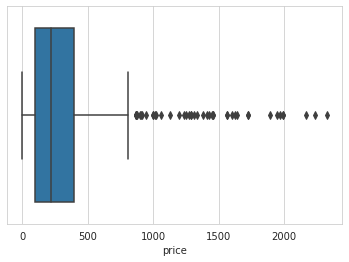

In [68]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

#sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=fp_df["price"])

#### Plot the pdf with the `teacher_number_of_previously_posted_projects` of  `false positive data points`

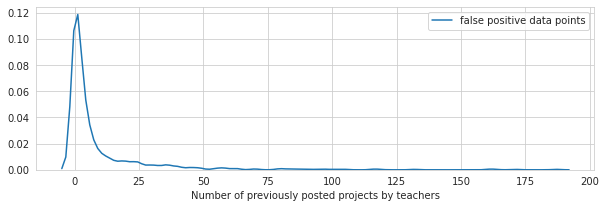

In [69]:
plt.figure(figsize=(10,3))
sns.kdeplot(data=fp_df["teacher_number_of_previously_posted_projects"].values, label = "false positive data points")
plt.legend()
plt.xlabel('Number of previously posted projects by teachers')
plt.show()

### 4.3.2 Applying Decision Tree on TFIDF W2V

In [75]:
# stroring variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [76]:
# Vectorizing preprocessed titile using TFIDF W2V
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_title.append(vector)

print(len(tfidf_w2v_vectors_train_title))
print(len(tfidf_w2v_vectors_train_title[0]))

100%|██████████| 67000/67000 [00:02<00:00, 22913.91it/s]

67000
300


In [78]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_title.append(vector)

print(len(tfidf_w2v_vectors_test_title))
print(len(tfidf_w2v_vectors_test_title[0]))

100%|██████████| 33000/33000 [00:01<00:00, 22655.56it/s]

33000
300


#### Vectorizing:  preprocessed_essays using TFIDF W2V

In [79]:
#Encoding Essay
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [80]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_essays.append(vector)

print(len(tfidf_w2v_vectors_train_essays))
print(len(tfidf_w2v_vectors_train_essays[0]))

100%|██████████| 67000/67000 [02:37<00:00, 424.96it/s]

67000
300


In [81]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_essays.append(vector)

print(len(tfidf_w2v_vectors_test_essays))
print(len(tfidf_w2v_vectors_test_essays[0]))

100%|██████████| 33000/33000 [01:15<00:00, 436.43it/s]

33000
300


#### Preparing Set with TFIDF W2V: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

In [82]:
#we need to merge all the numerical vectors i.e catogorical, text, numerical vectors
from scipy.sparse import hstack
X_train_set4 = hstack((tfidf_w2v_vectors_train_title, tfidf_w2v_vectors_train_essays, X_train_categories_one_hot, X_train_sub_categories_one_hot, X_train_school_state_one_hot, X_train_teacher_prefix_one_hot, X_train_project_grade_category_one_hot, X_train_price_standardized, X_train_teacher_number_of_previously_posted_projects_standardized)).tocsr()
#X_cv_set4= hstack((tfidf_w2v_vectors_cv_title, tfidf_w2v_vectors_cv_essays, X_cv_categories_one_hot, X_cv_sub_categories_one_hot, X_cv_school_state_one_hot, X_cv_teacher_prefix_one_hot, X_cv_project_grade_category_one_hot, X_cv_price_standardized, X_cv_teacher_number_of_previously_posted_projects_standardized)).tocsr()
X_test_set4 = hstack((tfidf_w2v_vectors_test_title, tfidf_w2v_vectors_test_essays, X_test_categories_one_hot, X_test_sub_categories_one_hot, X_test_school_state_one_hot, X_test_teacher_prefix_one_hot, X_test_project_grade_category_one_hot, X_test_price_standardized, X_test_teacher_number_of_previously_posted_projects_standardized)).tocsr()

print("X_train_set4 Data matrix")
print(X_train_set4.shape, y_train.shape)
#print(X_cv_set4.shape, y_cv.shape)
print(X_test_set4.shape, y_test.shape)
print("="*100)


# NOTE: Here,we are considering fewer points for SET3 due to compute time.
X_train_set4_new=X_train_set4[0:50000]
#X_cv_set4_new=X_cv_set4[0:4000]
X_test_set4_new= X_test_set4[0:16000]

y_train_new=y_train[0:50000]
#y_cv_new=y_cv[0:4000]
y_test_new=y_test[0:16000]

print("Final Data matrix")
print(X_train_set4_new.shape, y_train_new.shape)
print(X_test_set4_new.shape, y_test_new.shape)
print("="*100)

X_train_set4 Data matrix
(67000, 701) (67000,)
(33000, 701) (33000,)
Final Data matrix
(50000, 701) (50000,)
(16000, 701) (16000,)


#### Hyperparameter tuning

In [83]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Code ref: hhttps://michael-fuchs-python.netlify.app/2019/11/30/introduction-to-decision-trees/
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
   "max_depth": [1,5,10,50], 
   "min_samples_split": [5,10,100,500]
}

model = DecisionTreeClassifier()
clf = GridSearchCV(model, param_grid=params, cv=3, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_set4_new, y_train_new)

results = pd.DataFrame.from_dict(clf.cv_results_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

In [84]:
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.098422      0.140773         0.092325        0.008588   
1       3.720770      0.027720         0.083389        0.013817   
2       3.664963      0.006200         0.064922        0.001590   
3       3.924277      0.153291         0.081408        0.014526   
4      16.646121      0.923158         0.087572        0.007883   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                     100   
3               1                     500   
4               5                       5   

                                       params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 5}           0.560450   
1   {'max_depth': 1, 'min_samples_split': 10}           0.560450   
2  {'max_depth': 1, 'min_samples_split': 100}           0.560450   
3  {'max_depth': 1, 'min_samples_split': 500}           0.560450   
4    {'max_depth': 5, 'min_samples_split': 5}           0.627564   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.543632           0.558624         0.554235        0.007535   
1           0.543632           0.558624         0.554235        0.007535   
2           0.543632           0.558624         0.554235        0.007535   
3           0.543632           0.558624         0.554235        0.007535   
4           0.618637           0.636451         0.627550        0.007273   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            0.564514            0.550383   
1               10            0.564514            0.550383   
2               10            0.564514            0.550383   
3               10            0.564514            0.550383   
4                1            0.664266            0.661095   

   split2_train_score  mean_train_score  std_train_score  
0            0.562986          0.559294         0.006332  
1            0.562986          0.559294         0.006332  
2            0.562986          0.559294         0.006332  
3            0.562986          0.559294         0.006332  
4            0.660396          0.661919         0.001684

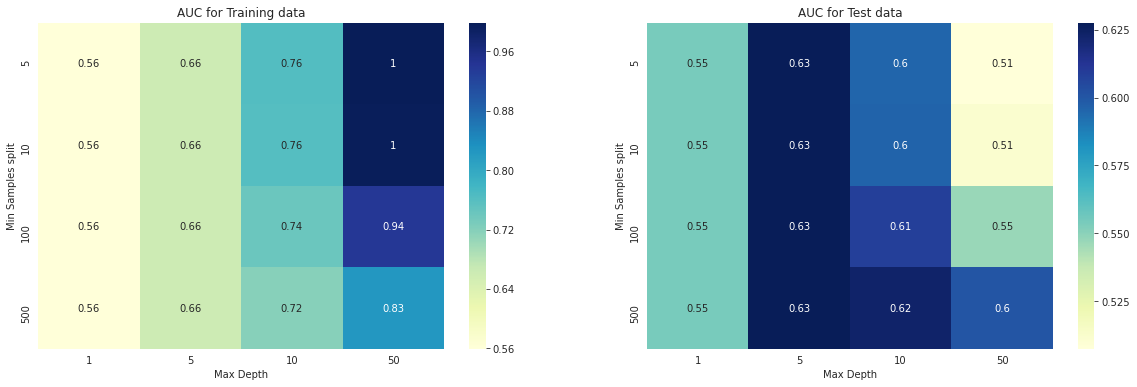

In [85]:
# Ref: https://www.kaggle.com/arindambanerjee/grid-search-simplified
import matplotlib.pyplot as plt
import seaborn as sns
max_depth_list = list(clf.cv_results_['param_max_depth'].data)
min_samples_split_list = list(clf.cv_results_['param_min_samples_split'].data)
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Min Samples split':min_samples_split_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Min Samples split', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Min Samples split':min_samples_split_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Min Samples split', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu", ).set_title('AUC for Test data')
plt.show()

In [86]:
print(clf.best_params_)

{'max_depth': 5, 'min_samples_split': 5}


#### Testing the performance of the model on test data, plotting ROC Curves

In [87]:
#here we are choosing the best paramaters
best_max_depth = 5
best_min_samples_split = 5

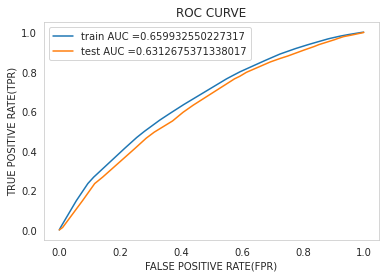

In [88]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split)
model.fit(X_train_set4_new, y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_train_set4_new)    
y_test_pred = batch_predict(model, X_test_set4_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_new, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE(FPR)")
plt.ylabel("TRUE POSITIVE RATE(TPR)")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### Confusion Matrix

In [89]:
#ref link: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_new, predict_with_best_t(y_train_pred, best_t)))
tn,fp,fn,tp=confusion_matrix(y_train_new, predict_with_best_t(y_train_pred, best_t)).ravel()

tb = PrettyTable()
tb.title= 'Train confusion matrix'
tb.field_names= ("","Predicted: NO" ,"Predicted: YES")
tb.add_row(["Actual : NO",tn,fp ])
tb.add_row(["Actual : YES", fn,tp])
print(tb)

# Collect predicted points
test_predicted_pts2=predict_with_best_t(y_test_pred, best_t)

print("Test confusion matrix")
print(confusion_matrix(y_test_new, predict_with_best_t(y_test_pred, best_t)))
tn,fp,fn,tp=confusion_matrix(y_test_new, predict_with_best_t(y_test_pred, best_t)).ravel()
tb = PrettyTable()
tb.title= 'Test confusion matrix'
tb.field_names= ("","Predicted: NO" ,"Predicted: YES")
tb.add_row(["Actual : NO",tn,fp ])
tb.add_row(["Actual : YES", fn,tp])
print(tb)

the maximum value of tpr*(1-fpr) 0.37537494179845077 for threshold 0.848
Train confusion matrix
[[ 4771  2815]
 [17099 25315]]
+-----------------------------------------------+
|             Train confusion matrix            |
+--------------+---------------+----------------+
|              | Predicted: NO | Predicted: YES |
+--------------+---------------+----------------+
| Actual : NO  |      4771     |      2815      |
| Actual : YES |     17099     |     25315      |
+--------------+---------------+----------------+
Test confusion matrix
[[1465 1004]
 [5479 8052]]
+-----------------------------------------------+
|             Test confusion matrix             |
+--------------+---------------+----------------+
|              | Predicted: NO | Predicted: YES |
+--------------+---------------+----------------+
| Actual : NO  |      1465     |      1004      |
| Actual : YES |      5479     |      8052      |
+--------------+---------------+----------------+


#### Get all false positive data points

In [90]:
print(len(y_test_new))
print(len(test_predicted_pts2))
#print(type(y_test))
#print(y_test)
# Ref: https://www.appliedaicourse.com/wp-content/uploads/2019/03/Pandas-DataFrame-Notes.pdf

#Create dataframe with all the columns
fp_df2 = pd.DataFrame(columns=X_test.columns)

#check false positive data points i.e y_test==0 and y_predeicted==1
for i in range(len(test_predicted_pts2)):
    if((y_test_new[i]==0) & (test_predicted_pts2[i]==1)):
        # append false positive datapoint into fp_df dataframe
        fp_df2= fp_df2.append(X_test.filter(items=[i], axis=0))

#print(type(fp_df))
fp_df2.head(2)

16000
16000


Unnamed: 0       id                        teacher_id teacher_prefix  \
87      90891  p211903  2fdbc42b01be840ed04dbe054804cc09            mrs   
95     152643  p177457  ad31548c7ee6f5da24efaa7cc81bcf22             ms   

   school_state                Date project_grade_category  \
87           nj 2016-04-27 12:39:53          grades_prek_2   
95           sc 2016-04-27 13:08:05          grades_prek_2   

                                       project_title  \
87                          Listening to a Good Book   
95  Open Our Eyes to the World with Nonfiction Books   

                                      project_essay_1  \
87  Who doesn't enjoy a good book? In fact my clas...   
95  My students are always up and on the move. The...   

                                      project_essay_2  ...  \
87  My class of 19 kindergarteners is very eager t...  ...   
95  I teach a group of second graders that come in...  ...   

                                      project_essay_4  \
87  A listening center will engage students while ...   
95  My classroom will be improved through this pro...   

                             project_resource_summary  \
87  My students need opportunities to hear fluent ...   
95  My students need nonfiction books to improve c...   

   teacher_number_of_previously_posted_projects  \
87                                            0   
95                                            1   

                     clean_categories          clean_subcategories  \
87  AppliedLearning Literacy_Language    EarlyDevelopment Literacy   
95                  Literacy_Language  Literacy Literature_Writing   

                                                essay  \
87  Who doesn't enjoy a good book? In fact my clas...   
95  My students are always up and on the move. The...   

                                  preprocessed_essays  \
87  who not enjoy good book in fact class hungers ...   
95  my students always move they always asking ans...   

                      preprocessed_title  price  quantity  
87                   listening good book  276.5         4  
95  open our eyes world nonfiction books  356.0         4  

[2 rows x 21 columns]

#### Plot the WordCloud with the words of essay text of  `false positive data points`

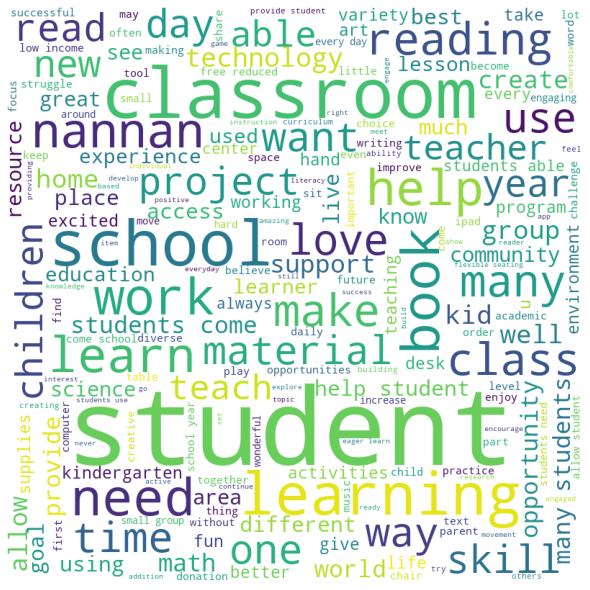

In [91]:
# Code ref: https://www.geeksforgeeks.org/generating-word-cloud-python/

# Generate WordCloud of an Essay

comment_words = ''
stopwords= set(STOPWORDS)
for val in fp_df2['preprocessed_essays'].values:
    
    # typecaste each val to string
    val=str(val)
    
    # split the value
    tokens=val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()        


#### Plot the box plot with the `price` of `false positive data points`

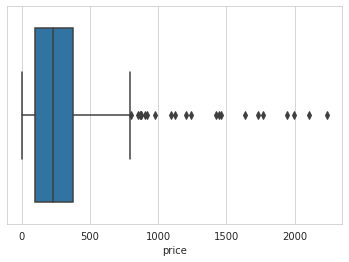

In [92]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x=fp_df2["price"])

#### Plot the pdf with the `teacher_number_of_previously_posted_projects` of  `false positive data points`

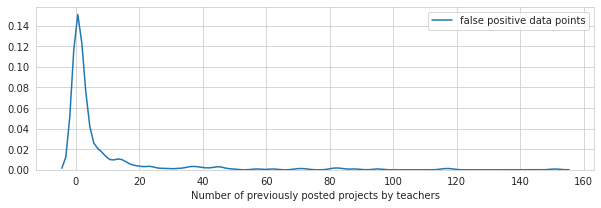

In [93]:
plt.figure(figsize=(10,3))
sns.kdeplot(data=fp_df2["teacher_number_of_previously_posted_projects"].values, label = "false positive data points")
plt.legend()
plt.xlabel('Number of previously posted projects by teachers')
plt.show()

<h2>5. Getting top features using `feature_importances_`</h2>

In [94]:
from sklearn.tree import DecisionTreeClassifier  
model = DecisionTreeClassifier(max_depth=None,min_samples_split=500)
model.fit(X_train_set2, y_train)

#Code ref : https://www.kdnuggets.com/2019/08/understanding-decision-trees-classification-python.html
# Get feature importance 
importances = pd.DataFrame({'feature':X_train_set2,'importance':np.round(model.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
print(importances.shape)
#importances.head()
print(importances)

(16324, 2)
                                                 feature  importance
16322    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0254
10043    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0195
14457    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0119
16323    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0118
10538    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0098
...                                                  ...         ...
5805     (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0000
5806     (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0000
5807     (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0000
5810     (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0000
8162     (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0000

[16324 rows x 2 columns]


In [95]:
print(type(importances))
print(type(X_train_set2))
print(X_train_set2.shape)

# Get all the features which are having non-zero feature importance
filtered_importances= importances[importances['importance']>0]
print(filtered_importances.shape)
filtered_importances.head()

<class 'pandas.core.frame.DataFrame'>
<class 'scipy.sparse.csr.csr_matrix'>
(67000, 16324)
(2520, 2)


feature  importance
16322    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0254
10043    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0195
14457    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0119
16323    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0118
10538    (0, 621)\t0.48425651533501435\n  (0, 1270)\t...      0.0098

In [96]:
# Code ref = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html
# Convert sparse matrix to dataframe
X_train_set2_imp_feature= pd.DataFrame.sparse.from_spmatrix(X_train_set2)
X_test_set2_imp_feature= pd.DataFrame.sparse.from_spmatrix(X_test_set2)
"""X_train_set2_imp_feature.head()
print(type(filtered_importances.index.array))
print(filtered_importances.index.array)"""

#Code ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html#pandas.Index

# Get all the rows with importance features from X_train_set2
X_train_set2_imp_feature= X_train_set2_imp_feature.loc[:,filtered_importances.index.array]
X_test_set2_imp_feature= X_test_set2_imp_feature.loc[:,filtered_importances.index.array]

print(X_train_set2_imp_feature.shape)
print(X_test_set2_imp_feature.shape)

(67000, 2520)
(33000, 2520)


In [97]:
X_train_set2_imp_feature.head()

16322  10043  14457     16323     10538  12353     15532  9183   4026   \
0  0.004651    0.0    0.0 -0.367372  0.018921    0.0  0.000000    0.0    0.0   
1  3.624582    0.0    0.0 -0.403564  0.018735    0.0  0.000000    0.0    0.0   
2 -0.521428    0.0    0.0 -0.367372  0.022943    0.0  0.000000    0.0    0.0   
3 -0.734195    0.0    0.0 -0.403564  0.000000    0.0  0.041223    0.0    0.0   
4 -0.649450    0.0    0.0 -0.403564  0.022986    0.0  0.000000    0.0    0.0   

   14806  ...  11473  3969   8263   12144  19     10969  13606  748    11373  \
0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   11277  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 2520 columns]

### Applying Logistic Regression on all the features which are having non-zero feature importance.

#### Hyperparameter tuning

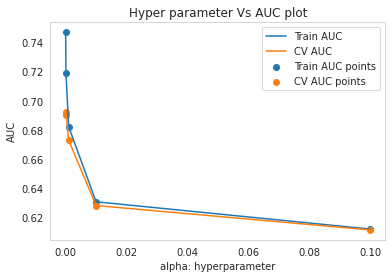

{'alpha': 0.0001}


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0      20.807063      3.043192         0.322953        0.088103       1e-05   
1      11.463551      0.317799         0.270979        0.000675      0.0001   
2       9.944365      0.091039         0.272080        0.001666       0.001   
3       9.839476      0.137717         0.270470        0.000917        0.01   
4       9.459025      0.111014         0.270528        0.000924         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}           0.684018           0.694512           0.680017   
1  {'alpha': 0.0001}           0.689045           0.684617           0.684577   
2   {'alpha': 0.001}           0.668304           0.667911           0.664351   
3    {'alpha': 0.01}           0.626595           0.616545           0.625425   
4     {'alpha': 0.1}           0.611926           0.602812           0.609956   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.700442  ...         0.690575        0.007461                2   
1           0.704885  ...         0.692073        0.007897                1   
2           0.688599  ...         0.672949        0.008634                3   
3           0.635869  ...         0.628244        0.007465                4   
4           0.615928  ...         0.611530        0.005064                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.744211            0.747289            0.750378   
1            0.720542            0.716730            0.723708   
2            0.682289            0.683794            0.680006   
3            0.630124            0.633157            0.630241   
4            0.611781            0.614283            0.612561   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.746436            0.746657          0.746994         0.001985  
1            0.716257            0.719646          0.719377         0.002718  
2            0.683588            0.681755          0.682286         0.001375  
3            0.629553            0.630964          0.630808         0.001257  
4            0.611063            0.610878          0.612113         0.001237  

[5 rows x 21 columns]

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Code ref: https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier

params = {
    #"loss" : ["log"],
    "alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1],
    #"penalty" : ["l2", "l1", "elasticnet", "none"],
}

logreg = SGDClassifier(loss="log", max_iter=1000)
clf = GridSearchCV(logreg, param_grid=params, cv=5, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_set2_imp_feature, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
#K =  results['param_n_neighbors']

plt.plot(params['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(params['alpha'], train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(params['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(params['alpha'], cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(params['alpha'], train_auc, label='Train AUC points')
plt.scatter(params['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show() 

print(clf.best_params_) 
results.head()

#### Testing the performance of the model on test data, plotting ROC Curves

In [99]:
#here we are choosing the best_alpha
best_alpha = 0.0001

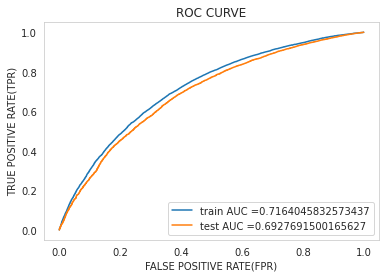

In [100]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logreg = SGDClassifier(loss="log",alpha= best_alpha,max_iter=1000)
logreg.fit(X_train_set2_imp_feature, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(logreg, X_train_set2_imp_feature)    
y_test_pred = batch_predict(logreg, X_test_set2_imp_feature)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE(FPR)")
plt.ylabel("TRUE POSITIVE RATE(TPR)")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### Confusion Matrix

In [101]:
#ref link: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
tn,fp,fn,tp=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)).ravel()

tb = PrettyTable()
tb.title= 'Train confusion matrix'
tb.field_names= ("","Predicted: NO" ,"Predicted: YES")
tb.add_row(["Actual : NO",tn,fp ])
tb.add_row(["Actual : YES", fn,tp])
print(tb)

print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
tn,fp,fn,tp=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)).ravel()
tb = PrettyTable()
tb.title= 'Test confusion matrix'
tb.field_names= ("","Predicted: NO" ,"Predicted: YES")
tb.add_row(["Actual : NO",tn,fp ])
tb.add_row(["Actual : YES", fn,tp])
print(tb)

the maximum value of tpr*(1-fpr) 0.4388003656982881 for threshold 0.851
Train confusion matrix
[[ 6469  3684]
 [17697 39150]]
+-----------------------------------------------+
|             Train confusion matrix            |
+--------------+---------------+----------------+
|              | Predicted: NO | Predicted: YES |
+--------------+---------------+----------------+
| Actual : NO  |      6469     |      3684      |
| Actual : YES |     17697     |     39150      |
+--------------+---------------+----------------+
Test confusion matrix
[[ 3038  1963]
 [ 8794 19205]]
+-----------------------------------------------+
|             Test confusion matrix             |
+--------------+---------------+----------------+
|              | Predicted: NO | Predicted: YES |
+--------------+---------------+----------------+
| Actual : NO  |      3038     |      1963      |
| Actual : YES |      8794     |     19205      |
+--------------+---------------+----------------+


<h1>2. Summary</h1>

#### Comparing performance of all the models

In [103]:
#ref link: http://zetcode.com/python/prettytable/
tb = PrettyTable()
tb.title= 'Summary'
tb.field_names= ("Vectorizer","Model" ,"Hyperparameter", "AUC")
tb.add_row(["TFIDF", "Decision Tree","max_depth: 10, min_samples_split: 500", "0.6395"])
tb.add_row(["TFIDF W2V", "Decision Tree","max_depth: 5, min_samples_split: 5","0.6312"  ])
tb.add_row(["Using important features", "Logistic Regression", "alpha :0.0001","0.6927" ])
print(tb)

+-------------------------------------------------------------------------------------------------+
|                                             Summary                                             |
+--------------------------+---------------------+---------------------------------------+--------+
|        Vectorizer        |        Model        |             Hyperparameter            |  AUC   |
+--------------------------+---------------------+---------------------------------------+--------+
|          TFIDF           |    Decision Tree    | max_depth: 10, min_samples_split: 500 | 0.6395 |
|        TFIDF W2V         |    Decision Tree    |   max_depth: 5, min_samples_split: 5  | 0.6312 |
| Using important features | Logistic Regression |             alpha :0.0001             | 0.6927 |
+--------------------------+---------------------+---------------------------------------+--------+


#### Observation: 
<li> We observed AUC value i.e ~ 0.63 with TFIDF W2V using max_depth: 5, min_samples_split: 5 </li>
<li> We observed good AUC of ~0.70 using Logistic Regression model on the important features which are obatined using feature_importances_ attribute by applying DT on TFIDF vectorizer Set </li>